# EDA Student Performance Indicator

# 1) Problem statement

- This project understands how the student's performance(tests scores) is affected by other variables such as Gender, Ethnicity, parental_level_of_education,lunch	test_preparation_course	math_score,reading_score,writing_score

# 2) Data Collection

 - DataSet - Kaggle
 - The data consists of 8 columns and 1000 rows

# 3) Dataset Information 

 - Gender: sex of students -> (Male/Female)
 - race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
 - Parental level of education: parents'final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
 - lunch: having lunch before test(standard or free/reduced)
 - test preparation course: complete or not complete before test
 - Math_score
 - Reading_score
 - Writing_score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df = pd.read_csv('student.csv')


In [62]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [5]:
df.shape

(1000, 8)

# Data Checks To Perform:

. Check Missing values

. Check Duplicates

. Check data types

. Check the number of unique values of each column

. Check statistics of data set

. Check various categories present in the different categorical column

In [11]:
# check missing values ( All functions have same work.)
# df.isnull()
df.isna().sum()
# df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Insight or Observation

There is no missing values

In [14]:
# Check Duplicates
# df.duplicated()  [ True means duplicate values and False: means no duplicate values]
df.duplicated().sum()

0

There are no duplicate values in our dataset

In [15]:
## Check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
#3 Check the number of unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
## Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight or Observation

- From the above description of numerical data, all means are very close to each other-between 66 and 69

- All the standard deviation are also close-between 14.6 - 15.19 

- While there is a minimum of 0 for maths, other are having 17 and 10 value

- Students also got 100(full) marks also.

In [24]:
## Explore more info about the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# Explore last 5 data
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [41]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='object']

In [42]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [38]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='object']

In [39]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [46]:
df['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

In [47]:
df['race_ethnicity'].value_counts()  # To know about the values and unique data with this function.

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [45]:
## Aggregate the total score with mean

df['Total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['Average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='Average', ylabel='Count'>

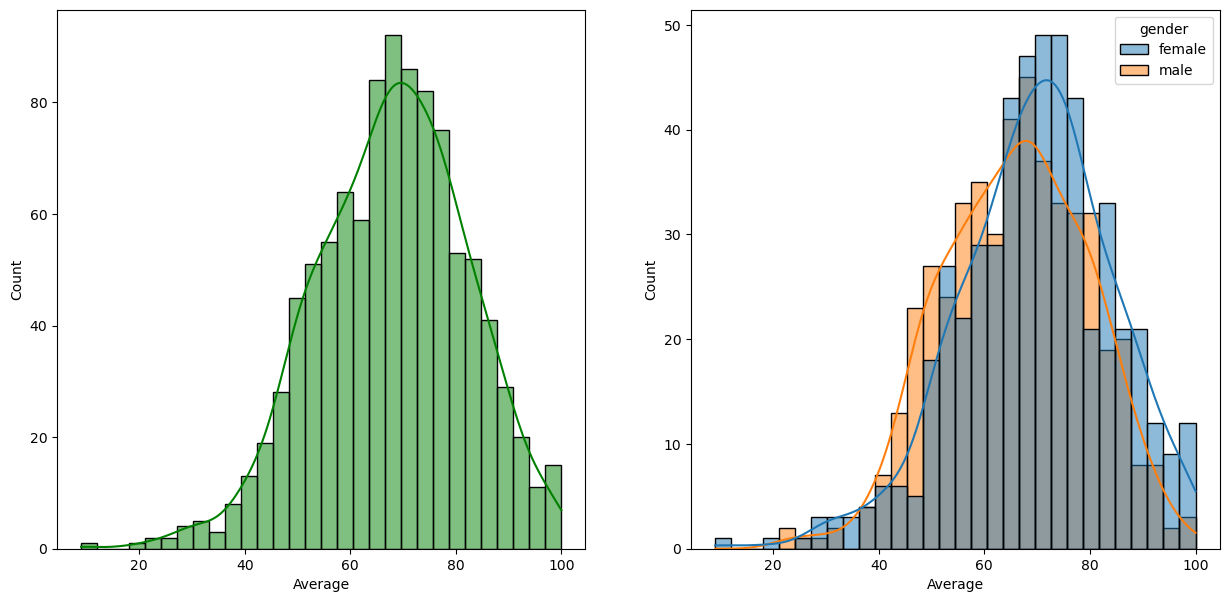

In [50]:
## Exploring more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)  # 1-2-1 means 1 row , 2 columns , and  1 - tells location [1st figurebox].
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')

plt.subplot(122)   # 1-2-2 : means 1 row , 2 columns , and  2 - tells location [2nd figurebox].
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')

# Insight 
 - Female student tends to perform well than Male students

<AxesSubplot: xlabel='Average', ylabel='Count'>

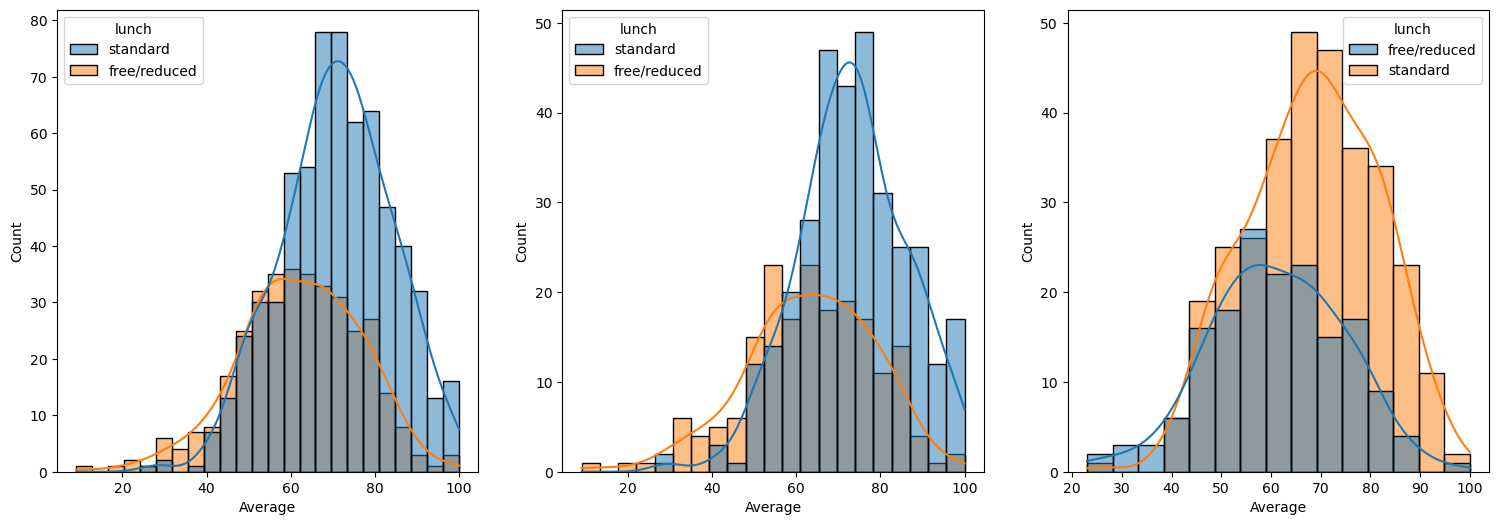

In [55]:
# Now, comparing with 'Lunch' Category to the Average
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue='lunch')

# Comparision and disguish between male and female
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True, hue='lunch')


# Insight 
- Standard Lunch help students perform well in exams
- Standard Lunch helps perform well in exams be it a male or female

<AxesSubplot: xlabel='Average', ylabel='Count'>

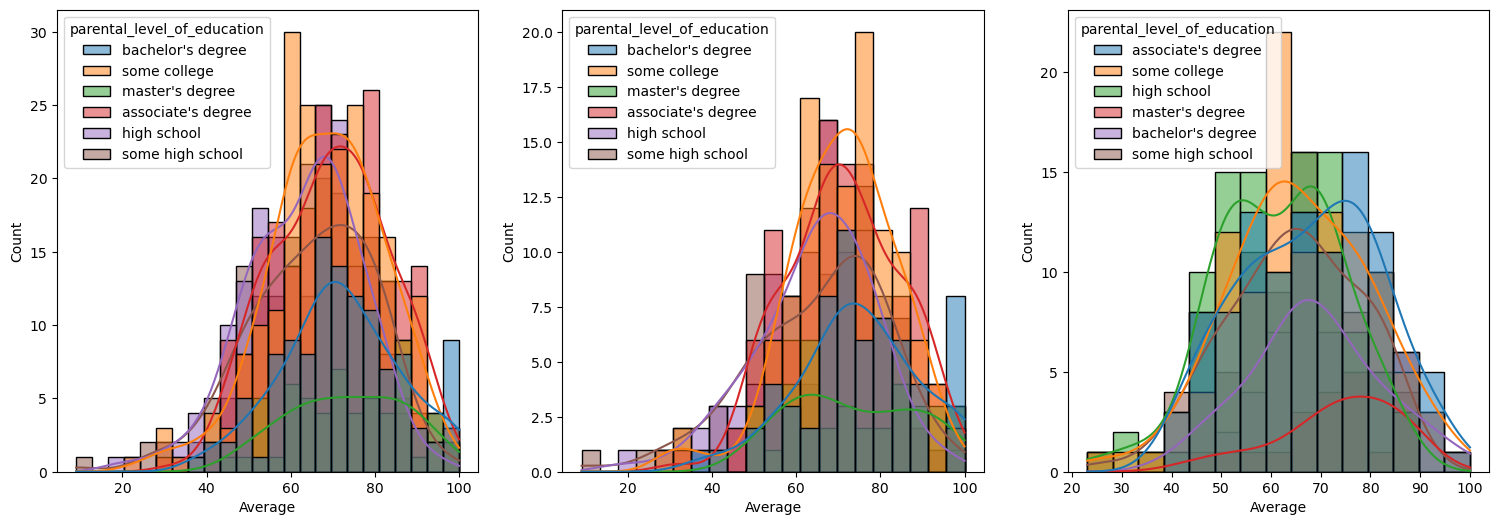

In [58]:
# Now, comparing with 'parental_level_of_education' Category to the Average
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue='parental_level_of_education')

# Effect the parental_level_of_education in Average of the students: 

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True, hue='parental_level_of_education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True, hue='parental_level_of_education')

# Insight
- In general parent's education don't help student perform well in exams.
- In 2nd plot, there is no effect of parent's education on female students.
- In 3rd plot, whose education is of associate's degree or master's degree their male child tend to perform well in Exams.

<AxesSubplot: xlabel='Average', ylabel='Count'>

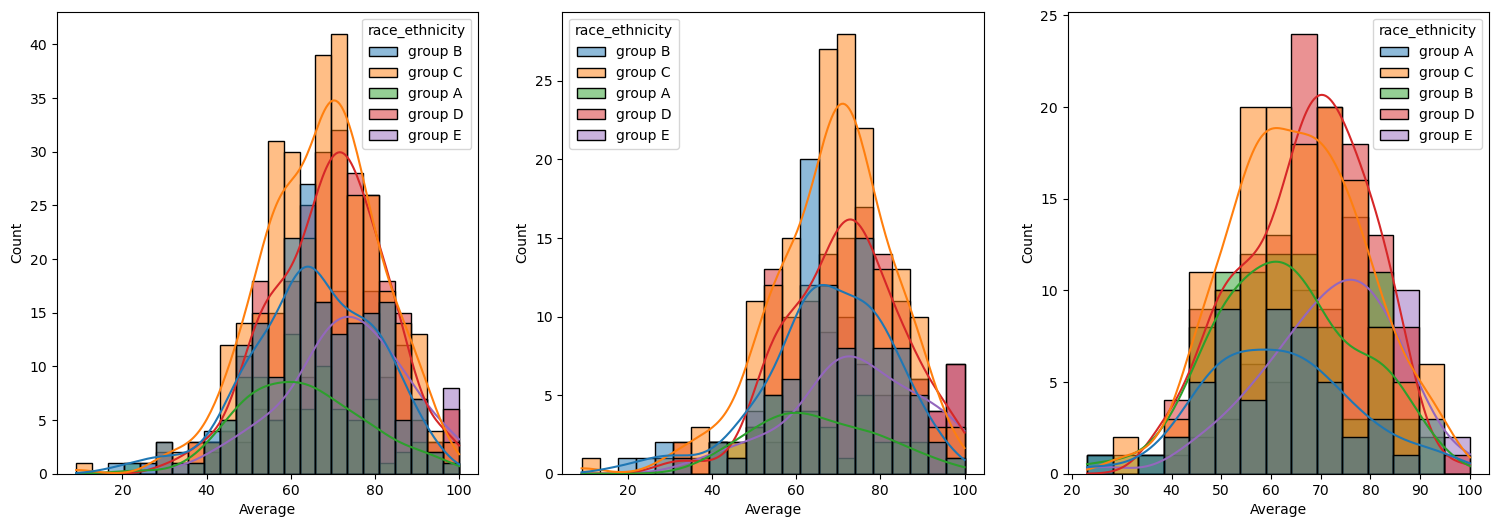

In [59]:
# Now, comparing with 'race_ethnicity' Category to the Average
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True, hue='race_ethnicity')

# Effect the race_ethnicity in Average of the students: 

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True, hue='race_ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True, hue='race_ethnicity')

## Insight 
 - Students of group A and group B tends to perform poorly in exams
 - Students of group A and group B tends to perform poorly in exam irrespective of whether they're male or female

<AxesSubplot: >

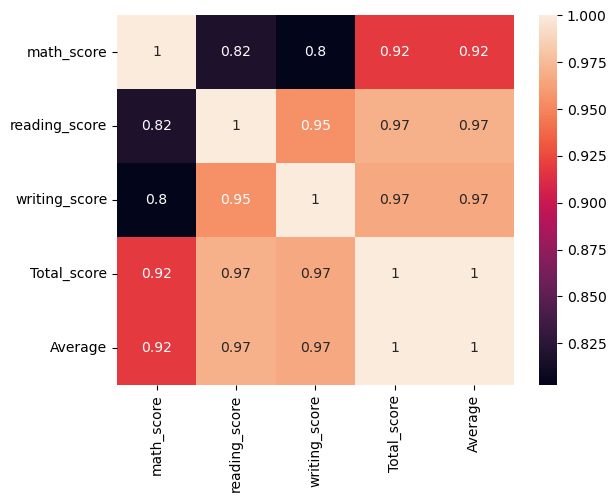

In [60]:
sns.heatmap(df.corr(),annot=True)